In [1]:
from sklearn.datasets import make_moons

In [22]:
X , y = make_moons(n_samples =5000, noise =0.3)

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state =42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.1)

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
from sklearn.svm import SVC

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
log_clf = LogisticRegression()

In [190]:
svc_clf = SVC()

In [191]:
forest_clf = RandomForestClassifier()

In [192]:
from sklearn.ensemble import VotingClassifier

In [193]:
voting_clf = VotingClassifier(estimators = [('lr',log_clf),('sr',svc_clf),('fc',forest_clf)],voting = 'hard')

In [194]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
voting_clf.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('sr', SVC(C=1...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [195]:
for clf in (log_clf,svc_clf,forest_clf,voting_clf):
    clf.fit(X_train_scaled,y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.856
SVC 0.888
RandomForestClassifier 0.88
VotingClassifier 0.888


In [196]:
from sklearn.tree import DecisionTreeClassifier

In [197]:
from sklearn.ensemble import BaggingClassifier

In [198]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 500,max_samples = 100,n_jobs =-1)

In [199]:
bag_clf.fit(X_train_scaled,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [200]:
y_pred = bag_clf.predict(X_test_scaled)

In [201]:
accuracy_score(y_test,y_pred)

0.90400000000000003

In [202]:
tree_clf = DecisionTreeClassifier()

In [203]:
tree_clf.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [204]:
y_pred = tree_clf.predict(X_test_scaled)

In [205]:
accuracy_score(y_test,y_pred)

0.84799999999999998

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [181]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [211]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 500,max_samples =100,n_jobs =-1,oob_score = True
                           )

In [212]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [213]:
bag_clf.oob_score_

0.90400000000000003

In [214]:
y_pred = bag_clf.predict(X_test)

In [215]:
accuracy_score(y_test,y_pred)

0.89600000000000002

In [216]:
bag_clf.oob_decision_function_

array([[ 0.75959079,  0.24040921],
       [ 0.87037037,  0.12962963],
       [ 0.43085106,  0.56914894],
       [ 0.        ,  1.        ],
       [ 0.02116402,  0.97883598],
       [ 0.65274151,  0.34725849],
       [ 0.29305913,  0.70694087],
       [ 0.63779528,  0.36220472],
       [ 1.        ,  0.        ],
       [ 0.0703125 ,  0.9296875 ],
       [ 0.94850949,  0.05149051],
       [ 0.93188011,  0.06811989],
       [ 0.36410256,  0.63589744],
       [ 0.90861619,  0.09138381],
       [ 0.01621622,  0.98378378],
       [ 0.04092072,  0.95907928],
       [ 0.00268817,  0.99731183],
       [ 0.28219178,  0.71780822],
       [ 0.1202046 ,  0.8797954 ],
       [ 0.        ,  1.        ],
       [ 0.02590674,  0.97409326],
       [ 0.9025641 ,  0.0974359 ],
       [ 0.12234043,  0.87765957],
       [ 0.4747191 ,  0.5252809 ],
       [ 0.01347709,  0.98652291],
       [ 0.99206349,  0.00793651],
       [ 0.07692308,  0.92307692],
       [ 0.03166227,  0.96833773],
       [ 0.06649616,

In [217]:
X.shape

(500, 2)

In [218]:
forest_clf =RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs =-1)

In [219]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
y_pred = forest_clf.predict(X_test)

In [221]:
accuracy_score(y_test,y_pred)

0.90400000000000003

In [222]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter ='random',max_leaf_nodes =16),n_estimators =500, max_samples =1.0,n_jobs =-1)

In [223]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [224]:
y_pred = bag_clf.predict(X_test)

In [225]:
accuracy_score(y_test,y_pred)

0.88800000000000001

In [227]:
from sklearn.ensemble import ExtraTreesClassifier

In [228]:
ex_tree_clf = ExtraTreesClassifier(n_estimators =500,max_leaf_nodes =16,n_jobs =-1)

In [229]:
ex_tree_clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [230]:
y_pred = ex_tree_clf.predict(X_test)

In [231]:
accuracy_score(y_test,y_pred)

0.88800000000000001

In [232]:
from sklearn import datasets

In [234]:
iris = datasets.load_iris()

In [235]:
X = iris["data"]

In [237]:
y = iris["target"]

In [238]:
rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs =-1)

In [239]:
rnd_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [240]:
for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.0987231300238
sepal width (cm) 0.0227347453444
petal length (cm) 0.455252231849
petal width (cm) 0.423289892783


In [241]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [242]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [243]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")

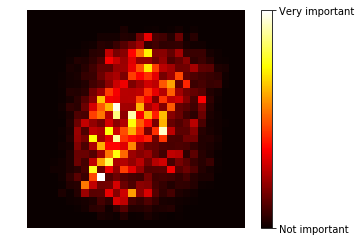

In [249]:
import matplotlib.pyplot as plt
import matplotlib
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.savefig("mnist_feature_importance_plot")
plt.show()

In [254]:
from sklearn.ensemble import AdaBoostClassifier

In [255]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),n_estimators =200, algorithm = 'SAMME.R', learning_rate =0.5)

In [256]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [257]:
y_pred = ada_clf.predict(X_test)

In [258]:
accuracy_score(y_test,y_pred)

0.90400000000000003

In [259]:
import numpy as np


In [260]:
X = 3 * np.random.randn(1000)

In [265]:
y = X**2 + 5*np.random.randn(1000)

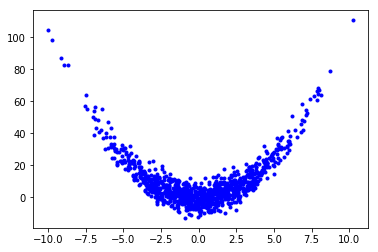

In [271]:
plt.plot(X,y,'b.')
X = X.reshape(-1,1)

In [272]:
from sklearn.tree import DecisionTreeRegressor

In [273]:
tree_reg1 = DecisionTreeRegressor(max_depth =2)

In [274]:
X_train ,X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [275]:
tree_reg1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [276]:
y2_train = y_train -tree_reg1.predict(X_train)

In [277]:
tree_reg2 = DecisionTreeRegressor(max_depth =2)

In [278]:
tree_reg2.fit(X_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [279]:
y3_train = y2_train - tree_reg2.predict(X_train)

In [280]:
tree_reg3 = DecisionTreeRegressor(max_depth =2)

In [281]:
tree_reg3.fit(X_train,y3_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [283]:
y_pred = sum(tree.predict(X_val) for tree in (tree_reg1,tree_reg2,tree_reg3))

In [285]:
from sklearn.metrics import mean_squared_error

In [286]:
mse = mean_squared_error(y_pred,y_val)

In [287]:
np.sqrt(mse)

6.5517421708610888

In [288]:
from sklearn.ensemble import GradientBoostingRegressor

In [293]:
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 4, learning_rate =1.0)

In [294]:
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=4, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [295]:
y_pred = gbrt.predict(X_val)
mse = mean_squared_error(y_val,y_pred)
np.sqrt(mse)

6.1709327335213278

In [297]:
gbrt = GradientBoostingRegressor(max_depth =2,n_estimators =120)

In [298]:
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [299]:
errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [300]:
best_n_estimators = np.argmin(errors)

In [301]:
best_n_estimators

115

In [313]:
gbrt =GradientBoostingRegressor(max_depth = 2, warm_start = True)

In [314]:
min_val_error = float('inf')

In [315]:
error_going_up = 0

In [316]:
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val,y_pred)
    if val_error<min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 5:
            break


In [317]:
n_estimators

87

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
X, y  = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
X_test, y_test = X[60000:],y[60000:]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, y_train = X[:60000],y[:60000]

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_clf = LogisticRegression(random_state =42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest_clf = RandomForestClassifier()

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
extra_clf = ExtraTreesClassifier()

In [32]:
from sklearn.svm import SVC

In [33]:
svc_clf = SVC()

In [34]:
from sklearn.ensemble import VotingClassifier

In [35]:
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('fc',forest_clf),('ec',extra_clf),('sc',svc_clf)])

In [36]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, forest_clf, extra_clf, svc_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.822
RandomForestClassifier 0.89
ExtraTreesClassifier 0.884
SVC 0.916
VotingClassifier 0.892


In [48]:
y_pred1 = log_clf.predict(X_val)
y_pred2 = forest_clf.predict(X_val)
y_pred3 = extra_clf.predict(X_val)
y_pred4 = svc_clf.predict(X_val)
y_pred5 = voting_clf.predict(X_val)

In [51]:
import numpy as np
y_train2 = np.c_[y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]

In [52]:
y_train2.shape

(450, 5)

In [53]:
svc_clf2 = SVC()

In [54]:
svc_clf2.fit(y_train2,y_val)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
y_pred1 = log_clf.predict(X_test)
y_pred2 = forest_clf.predict(X_test)
y_pred3 = extra_clf.predict(X_test)
y_pred4 = svc_clf.predict(X_test)
y_pred5 = voting_clf.predict(X_test)

In [56]:
y_test1 = np.c_[y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]

In [57]:
y_pred = svc_clf2.predict(y_test1)

In [58]:
accuracy_score(y_pred,y_test)

0.89400000000000002

In [59]:
y_test1

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0],
       ..., 
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])